In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('Human_Resources_Employee_Attrition.csv')
data.head()

,satisfaction_level,last_evaluation,number_of_projects,average_monthly_hours,years_at_company,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
data.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_of_projects       0
average_monthly_hours    0
years_at_company         0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

In [4]:
#no missing values

In [5]:
data.shape

(14999, 10)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_of_projects     14999 non-null  int64  
 3   average_monthly_hours  14999 non-null  int64  
 4   years_at_company       14999 non-null  int64  
 5   work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [7]:
data.describe()

,satisfaction_level,last_evaluation,number_of_projects,average_monthly_hours,years_at_company,work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [8]:
data['department'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [9]:
data['salary'].unique()

array(['low', 'medium', 'high'], dtype=object)

In [10]:
def sal(x):
    if x=='low':
        return 1
    elif x=='medium':
        return 2
    else:
        return 3

In [11]:
data['sal']= data['salary'].map(sal)
data['sal'].head()

0    1
1    2
2    2
3    1
4    1
Name: sal, dtype: int64

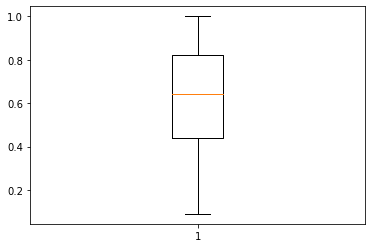

In [12]:
plt.boxplot(data['satisfaction_level'])
plt.show()

In [13]:
data['satisfaction_level'].describe()

count    14999.000000
mean         0.612834
std          0.248631
min          0.090000
25%          0.440000
50%          0.640000
75%          0.820000
max          1.000000
Name: satisfaction_level, dtype: float64

### Outlier treatment

In [14]:
data['years_at_company'].describe()

count    14999.000000
mean         3.498233
std          1.460136
min          2.000000
25%          3.000000
50%          3.000000
75%          4.000000
max         10.000000
Name: years_at_company, dtype: float64

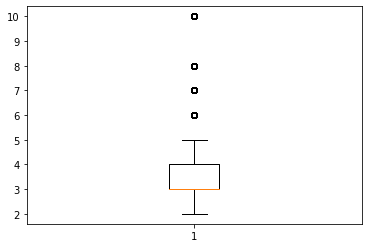

In [15]:
plt.boxplot(data['years_at_company'])
plt.show()

In [16]:
from scipy import stats

In [17]:
z= np.abs(stats.zscore(data['years_at_company']))
z

array([0.34123516, 1.71343614, 0.34365527, ..., 0.34123516, 0.34365527,
       0.34123516])

In [18]:
data['years_at_company'].unique()

array([ 3,  6,  4,  5,  2,  8, 10,  7], dtype=int64)

In [19]:
median = np.median(data['years_at_company'])
median


3.0

In [20]:
def med(x):
    if x <=6:
        return x
    else:
        return median

In [21]:
year = data['years_at_company'].where(data['years_at_company']>6).sum()
year

4752.0

In [22]:
data['years_at_company']= data['years_at_company'].map(med)
data['years_at_company'].head()

0    3.0
1    6.0
2    4.0
3    5.0
4    3.0
Name: years_at_company, dtype: float64

In [23]:
data['years_at_company'].unique()

array([3., 6., 4., 5., 2.])

#### Number of people left organization

In [24]:
left_org = data['left'].where(data['left']==1).sum()

In [25]:
left_org

3571.0

In [26]:
percent = (left_org/data.shape[0])*100
percent



23.80825388359224

In [27]:
# therfore 23% of people left organization

<AxesSubplot:>

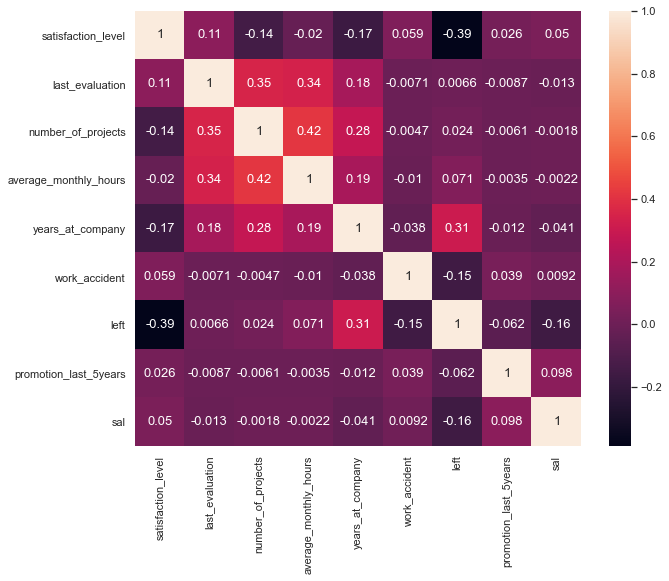

In [28]:
sns.set(rc = {'figure.figsize':(10,8)})
sns.heatmap(data=data.corr(),annot=True,annot_kws={"size": 13})

In [29]:
left_lowsal =data['left'].where(data['sal']==1).sum()
(left_lowsal/data.shape[0])*100

14.48096539769318

In [30]:
left_medsal =data['left'].where(data['sal']==2).sum()
(left_medsal/data.shape[0])*100

8.780585372358157

#### Analysis of the correlation plot

The factors for which the person leaves the company are:
1) satisfaction level- it is the most important factor for a person to leave the company

2) work accident- any accident at work - occurance of accidents at the work also effects the leaving criteria

3) salary- people with less salary has a negative correlation with leeaving the organization

4) number of years working in the organization- it has a positive correaltion with people leaving the organization. The more years a person spend the more he is likely to stay in the organization

### T TEST

In [31]:
from scipy import stats

In [32]:
left = data['left']
left = list(left)
#left

In [33]:
mean_left= np.mean(left)

In [34]:
satisfy = data['satisfaction_level']
satisfy = list(satisfy)
mean_job = np.mean(satisfy)

In [35]:
t_value,p_value = stats.ttest_1samp(left,satisfy)

In [36]:
np.mean(t_value)

-107.75606410501015

In [37]:
pval = np.mean(p_value)

In [38]:
print('Here the t_value is: '+str(np.mean(t_value))+'p_value is :'+str(np.mean(p_value)))

Here the t_value is: -107.75606410501015p_value is :0.003174908657276681


In [39]:
alpha =0.05

In [40]:
if pval<= alpha:
    print('We reject NULL HYPOTHESIS')
else:
    print('We accept NULL HYPOTHESIS')
    

We reject NULL HYPOTHESIS


### CHI SQUARE TEST

In [41]:
from scipy import stats



In [42]:
df= data[['satisfaction_level','left']]
df.head()

,satisfaction_level,left
0,0.38,1
1,0.80,1
2,0.11,1
3,0.72,1
4,0.37,1


In [43]:
chi_stat,pval,dof,expected_values = stats.chi2_contingency(df)
pval

1.0

In [44]:
from scipy.stats import chi2
alpha = 0.05
critical_value = chi2.ppf(q=1-alpha, df=dof)
print('critical_value:', critical_value)

critical_value: 15284.01050063431


In [45]:
chi_stat>=critical_value

False



Accept Null Hypothesis since chi_stat >=critical_value.

Job satisfaction and leaving the company are strongly related


In [46]:
data.columns

Index(['satisfaction_level', 'last_evaluation', 'number_of_projects',
       'average_monthly_hours', 'years_at_company', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary', 'sal'],
      dtype='object')

In [47]:
x= data[['satisfaction_level', 'last_evaluation', 'number_of_projects',
       'average_monthly_hours', 'years_at_company', 'work_accident', 'sal',
       'promotion_last_5years',]]
x.head()

,satisfaction_level,last_evaluation,number_of_projects,average_monthly_hours,years_at_company,work_accident,sal,promotion_last_5years
0,0.38,0.53,2,157,3.0,0,1,0
1,0.80,0.86,5,262,6.0,0,2,0
2,0.11,0.88,7,272,4.0,0,2,0
3,0.72,0.87,5,223,5.0,0,1,0
4,0.37,0.52,2,159,3.0,0,1,0


In [48]:
y = data['left']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: left, dtype: int64

#### Spliting Data into training and testing

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
xtrain, xtest ,ytrain , ytest = train_test_split(x,y,test_size=0.2,random_state=1)

### Logistic Regression

In [51]:
from sklearn.linear_model import LogisticRegression

In [52]:
logreg= LogisticRegression()

In [53]:
model1 = logreg.fit(xtrain, ytrain)

C:\Users\tsharmili\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [54]:
prediction = logreg.predict(xtest)
prediction

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [55]:
model1.predict_proba(xtest)

array([[0.82235049, 0.17764951],
       [0.79834077, 0.20165923],
       [0.85215001, 0.14784999],
       ...,
       [0.88569829, 0.11430171],
       [0.44307761, 0.55692239],
       [0.93861061, 0.06138939]])

In [56]:
score = model1.score(xtest ,ytest) 
score

0.7986666666666666

In [57]:
from sklearn import metrics

In [58]:
cnf = metrics.confusion_matrix(ytest , prediction)
cnf

array([[2073,  214],
       [ 390,  323]], dtype=int64)

<AxesSubplot:>

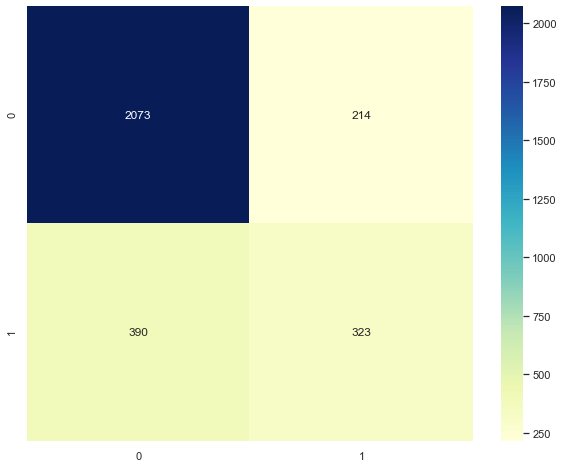

In [59]:
sns.heatmap(pd.DataFrame(cnf),cmap='YlGnBu',fmt='g',annot = True)

In [60]:
metrics.roc_curve(ytest,model1.predict_proba(xtest)[:,1])
fpr ,tpr,threshold= metrics.roc_curve(ytest,model1.predict_proba(xtest)[:,1])

Text(0, 0.5, 'exited')

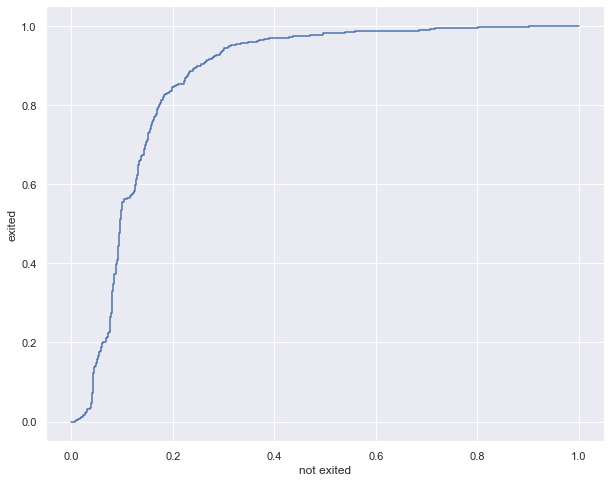

In [61]:
plt.plot(fpr,tpr,'-')
plt.xlabel('not exited')
plt.ylabel('exited')

In [62]:
#area under roc - curve

In [63]:
metrics.roc_auc_score(ytest,model1.predict_proba(xtest)[:,1])

0.8662836656484514

In [64]:
print(metrics.classification_report(ytest,model1.predict(xtest)))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87      2287
           1       0.60      0.45      0.52       713

    accuracy                           0.80      3000
   macro avg       0.72      0.68      0.69      3000
weighted avg       0.78      0.80      0.79      3000



### Decision Tree

In [65]:
import sklearn.tree as tree

from sklearn.tree import DecisionTreeClassifier

In [66]:
clf= DecisionTreeClassifier(max_depth=3, random_state=321 ) 

In [67]:
clf.fit(xtrain,ytrain)

DecisionTreeClassifier(max_depth=3, random_state=321)

In [68]:
clf.score(xtest,ytest)

0.964

In [69]:
pred_clf= clf.predict_proba(xtest)
pred_clf

array([[0.98713654, 0.01286346],
       [0.98713654, 0.01286346],
       [0.98713654, 0.01286346],
       ...,
       [0.98713654, 0.01286346],
       [0.05283308, 0.94716692],
       [0.98713654, 0.01286346]])

In [70]:

metrics.roc_auc_score(ytest,pred_clf[:,1])

0.969538479275814

In [71]:
predict_df = clf.predict(xtest)

In [72]:
c_R = metrics.classification_report(ytest,predict_df)
print(c_R)

              precision    recall  f1-score   support

           0       0.97      0.98      0.98      2287
           1       0.93      0.92      0.92       713

    accuracy                           0.96      3000
   macro avg       0.95      0.95      0.95      3000
weighted avg       0.96      0.96      0.96      3000



In [73]:
cnf_1 =metrics.confusion_matrix(ytest,prediction)

<AxesSubplot:>

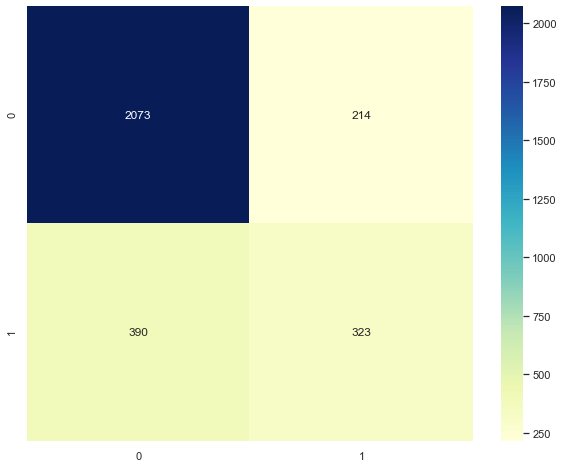

In [74]:
sns.heatmap(pd.DataFrame(cnf_1),cmap='YlGnBu',fmt='g',annot = True)

[Text(418.5, 713.475, 'satisfaction_level <= 0.465\ngini = 0.363\nsamples = 11999\nvalue = [9141, 2858]\nclass = 0'),
 Text(209.25, 509.625, 'number_of_projects <= 2.5\ngini = 0.476\nsamples = 3338\nvalue = [1303, 2035]\nclass = 1'),
 Text(104.625, 305.775, 'last_evaluation <= 0.575\ngini = 0.213\nsamples = 1416\nvalue = [172, 1244]\nclass = 1'),
 Text(52.3125, 101.92499999999995, 'gini = 0.1\nsamples = 1306\nvalue = [69, 1237]\nclass = 1'),
 Text(156.9375, 101.92499999999995, 'gini = 0.119\nsamples = 110\nvalue = [103, 7]\nclass = 0'),
 Text(313.875, 305.775, 'satisfaction_level <= 0.115\ngini = 0.484\nsamples = 1922\nvalue = [1131, 791]\nclass = 0'),
 Text(261.5625, 101.92499999999995, 'gini = 0.0\nsamples = 699\nvalue = [0, 699]\nclass = 1'),
 Text(366.1875, 101.92499999999995, 'gini = 0.139\nsamples = 1223\nvalue = [1131, 92]\nclass = 0'),
 Text(627.75, 509.625, 'years_at_company <= 4.5\ngini = 0.172\nsamples = 8661\nvalue = [7838, 823]\nclass = 0'),
 Text(523.125, 305.775, 'averag

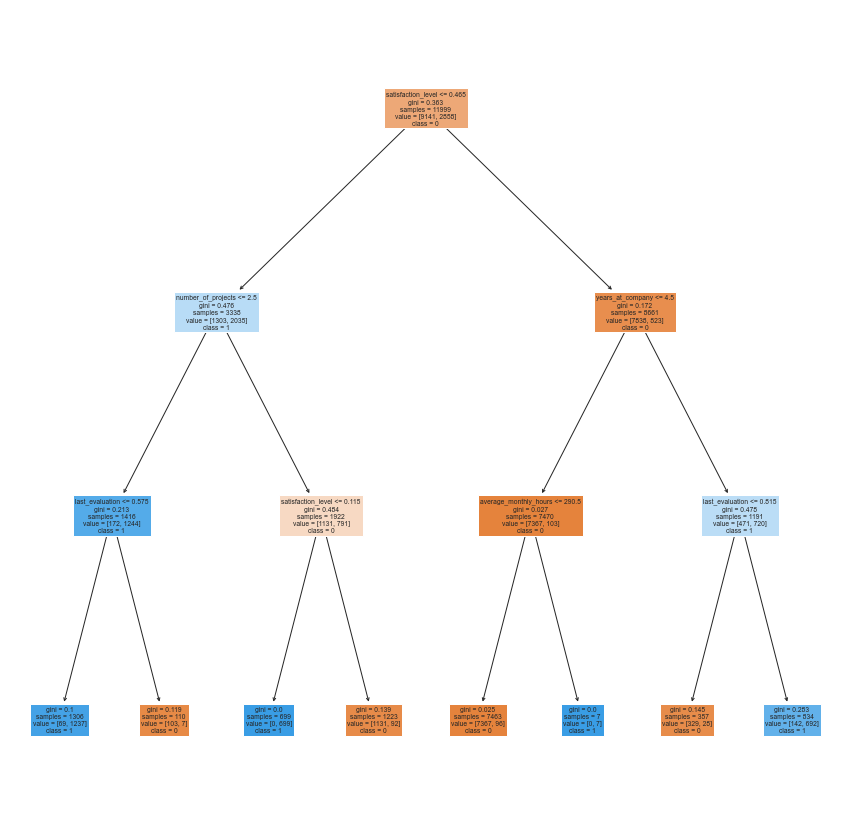

In [75]:
plt.figure(figsize=(15,15))
tree.plot_tree(clf,feature_names=x.columns,
              class_names=['0','1'],
              filled=True )


In [76]:
from sklearn.model_selection import GridSearchCV
mod = GridSearchCV(clf,param_grid={'max_depth':[2,3,4,5,6]})
mod.fit(xtrain,ytrain)

GridSearchCV(estimator=DecisionTreeClassifier(max_depth=3, random_state=321),
             param_grid={'max_depth': [2, 3, 4, 5, 6]})

In [77]:
mod.best_estimator_

DecisionTreeClassifier(max_depth=6, random_state=321)

In [78]:
mod.best_score_

0.9775814575517577

### Conclusion

Among the two models the best model to choose is Decision Tree model as the metrics score of Decision Tree module is greater than that of Logistic Regression model 